# Bayesian, Markov Chain Monte Carlo model Inference
  

## Scenario : Suspect Inference 

Inspector Andrea Markov receives a call that Lord Fauntleroy has been murdered in his manor house. She is told that only the cook and butler were present in the house at the time of the crime and that there is no evidence of an intruder. Further, she learns that the only possible murder weapons are a knife and poison. 

Before leaving the police station the Inspector instructs Sargent Bernoulli to gather information on the outcomes of similar murder investigations. She tells the Sargent that it is entirely possible that both the maid and the cook could have worked together. Since the cook and the butler could have acted alone or together, we will assume independence: $p(C,B) = p(C)p(B)$  


Then, other assuming the joint probability distribution is:

$$p(B,C,BW,CW,M)$$     

where the letters indicate the following variables;   
$B = $ butler committed the crime, {not murderer, murderer},   
$C = $ cook committed the crime, {not murderer, murderer},    
$BW = $ choice of weapon, {knife, knife with poison}, conditional on butler,  
$CW = $ choice of weapon, {knife, knife with poison}, conditional on cook,   
$M = $ murderer {butler or cook, third party alone, combination of butler or cook and third party}.    

Keeping in mind it is possible the cook, the butler and the third party could be guilty, and that participation in the crime in any capacity constitutes guilt, the distribution can be factorized in the following manner:

$$p(B,C,BW,CW,M) = p(B)\ p(C)\ p(BW\ |\ B)\ p(CW\ |\ C)\ p(M\ |\ BK,CW, C, W)$$  

A graph of the model is shown below. 

<img src="MurderDirected.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center> **DAG for murder evidence** </center>

## Background

## Graphical Parameters and Model Structure

In this project we will focus on the **learning** for Bayesian network models. There are two aspects of learning for Bayesian networks:  
###  **Parameter estimation** where the parameters of the CPDs of a model are estimated. 

There are several methods which can be used to estimate the parameters of a distribution including:
- Frequentist **maximum likelihood** or **ML** methods which only require that a likelihood function be specified. 
- Bayesian **maximum a-postiori** or **MAP** methods, which require the specification of both a likelihood function and a prior distribution of the model parameters. 


###  **Structure estimation** is the process of estimating the structure of the graphical model.

Some options for learning model structure include:

- **Eliciting knowledge** from experts on the independencies of the distribution. However, this can be a tedious process for more than fairly simple problems. 
- Estimate the potentials of the graph though parameter estimation or **parameter learning** of the distributions. This approach assumes that we know these distributions. 
- Use learning to the structure of the graph, known as **structure learning**. This approach will typically lead to an approximate solution, which may not capture the true independencies. 



The role of learning in an intelligent agent is illustrated in the figure below. For Bayesian models the learning and inference processes often merge as in the case where evidence is applied.  

<img src="img/Learning.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Learning in an intelligent agent** </center>



### Introduce : The Bernoulli and Beta distributions

A **single realization** of such a variable has a **Bernoulli distribution**. The Bernoulli distribution is a **parametric distribution** which we can express as:

$$p(\nu = 1) = \Theta \\
where\\
\nu = an\ observation\\
\Theta = probability\ parameter$$

For a series of observations of a binary valued variable we use the **Binomial distribution**. We call each observation where $\nu = 1$ a **success**. The Binomial distribution of $k$ successes in $n$ trials is then expressed as:

$$p(\nu = k\ |\ \Theta) = \binom{n}{k} \Theta^k (1-\Theta)^{n-k}$$

We want to specify a **Binomial likelihood** in Bayes theorem, we will also need to specify a prior distribution. We pick a prior distribution which is **conjugate** to the likelihood distribution so that the posterior distribution is the same as the prior. We can express this concept as:

$$posterior\_distribution(hypothesis\ |\ data) = \frac{likelihood(data\ |\ hypothesis)* conjugate\_prior(hypothesis)}{marginal\ distribtion\ data }\\
where\\
posterior\_distribution\ is\ same\ family\ as\ prior\_distribution$$

The question is, which distribution is the conjugate to the Binomial distribution? The answer is the **Beta distribution**. We can express the Beta distribution as: 

$$p(x\ |\ \alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha - 1}(1-x)^{\beta - 1},\ 0 \le x \le 1\\
where\\
B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha,\beta)}\\
and\\
\Gamma(x) = Gamma\ function$$

At first glance, the Beta distribution is a bit complicated. But for the most part the normalization with the Gamma function are not terribly important. 

Here is some example.

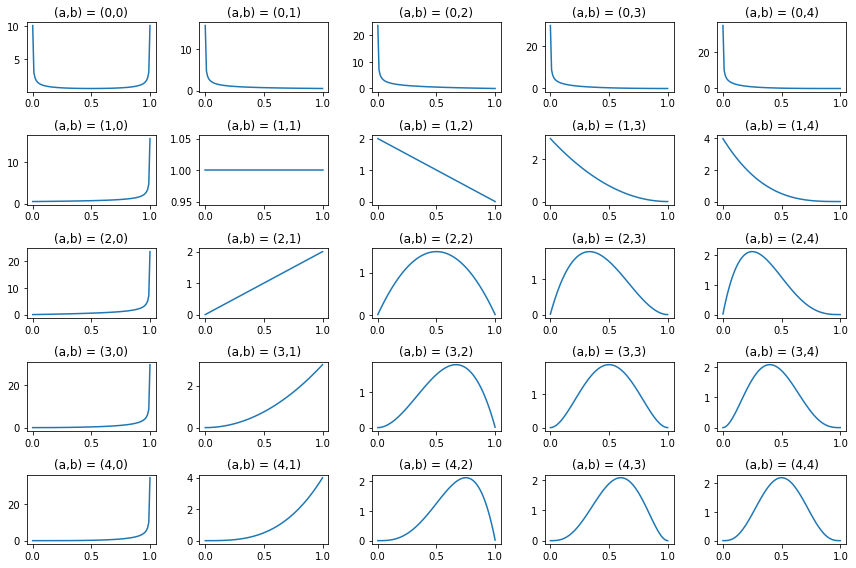

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import scipy.stats as ss
%matplotlib inline

plt.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = np.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(it.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    plt.plot(x, ss.beta.pdf(x, a, b))
    plt.title('(a,b) = (%d,%d)' % (a,b))
plt.tight_layout()    

Some points to notice here:

- The range is $0 \le Beta(x) \le 1$.
- If $\alpha \gt \beta$ the distribution is left skewed, if $\alpha \lt \beta$ the distribution is right skewed, and if $\alpha = \beta$ the distribution is symmetric.
- For $\alpha = 1$, $\beta = 1$ the distribution is uniform. 

With these preliminary in mind, we will now look at methods to estimate the parameter of the Binomial likelihood distribution $\theta$.

### Maximum likelihood method

Not surprisingly, in order to perform maximum likelihood estimation, we must define a **likelihood function** for the distribution we are trying to estimate. Given data $\mathcal{V}$ and parameters of the distribution, $\Theta$, we can express a likelihood function as $\mathcal{L}(\Theta, \mathcal{V}) = p(\mathcal{V}\ |\ \Theta)$. In most cases, we will work with the **log likelihood**, $log(p(\mathcal{V}\ |\ \Theta))$. The maximum likelihood estimate or MLE for the parameters is then:

$$\hat{\Theta} \doteq argmax_{\Theta} \{ log(p(\mathcal{V}\ |\ \Theta)) \}$$

In words, we want to find the parameters which maximize the likelihood of the distribution for the data sample. 

Let's use computing the maximum likelihood for the Bernoulli distribution as an example. The likelihood function for the Bernoulli distribution is given a data vector $\mathcal{V}$:

$$L(p) = \prod_{i=1}^n p^{\nu_i}\ (1-p)^{(1 - \nu_i)})$$

The log likelihood is easily computed:

$$\mathcal{l}(p) = log(p) \sum_{i=1}^n \nu_i + log(1-p)  \sum_{i=1}^n (1 - \nu_i)$$

To find the maximum of this function we must find a point where the first partial derivative is zero:

$$\frac{\partial \mathcal{l}(p)}{\partial p} = \frac{\sum_{i=1}^n \nu_i}{p} 
- \frac{\sum_{i=1}^n (1 - \nu_i)}{1-p} = 0$$

The solution is: 

$$p = \frac{1}{n} \sum_{i=1}^n \nu_i$$

The simple result is that the maximum likelihood value of $p$ is just the mean of the data. 


### Bayesian learning

We can now try the Bayesian approach to estimating the parameter $\Theta$. Conceptually we can visualize this process as a directed Bayesian model as shown below. 

<img src="img/PlateDiagram.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Bayes network and plate diagram for parameter estimation** </center>

The parameter $\Theta$ is causal to the vector of data values $\{ \nu^1, \nu^2, \nu^3, \ldots \nu^N \}$. This relationship is shown as a DAG on the left side of the figure above. On the right side of the diagram is a summary using **plate notation**. The plate is short hand for the $N$ values. 

There 

$$p(\Theta\ |\ \nu^1, \nu^2, \nu^3, \ldots \nu^N) \propto p(\Theta) \prod_{n=1}^N p(\nu^n\ |\ \Theta)
= p(\Theta) \prod_{n=1}^N \Theta^{I(\nu^n=1)}(1 - \Theta)^{I(\nu^n=0)}\\
\propto p(\Theta)\ \Theta^{\sum_{n=1}^N I(\nu^n=1)}(1 - \Theta)^{\sum_{n=1}^N I(\nu^n=0)} $$

For a simple binary case of $\{ True, False \}$ the solution can be obtained with the prior distribution $p(\Theta)$ and the counts, $\{ N_T, N_F \}$.

$$p(\Theta\ |\ \nu^1, \nu^2, \nu^3, \ldots \nu^N) \propto p(\Theta)\ \Theta^{N_T} (1 - \Theta)^{N_F}$$  
Given a data vector, $\mathcal{V}$, how do we compute the most probable value of $\Theta$. The solution in this case is relatively easy and can be performed using just counts of the two values, {True, False} or {1,0} and the prior distribution. 

The likelihood given counts can be expressed as follows.

$$\Theta^{\mathcal{C}(\nu_i = 1)} (1-\Theta)^{\mathcal{C}(\nu_i = 0)}\\
where\\
\mathcal{C} = count\ operator$$

Using the above likelihood, the posterior distribution can be expressed as:

$$p(\Theta\ |\ \mathcal{V}) \propto p(\Theta)\ \Theta^{\mathcal{C}(\nu_i = 1)} (1-\Theta)^{\mathcal{C}(\nu_i = 0)}$$


## Our Task's Analysis

To come back to our task,as a first step execute the code in the below to simulate the 20 cases for the dataset.

In [2]:
## Simulate the binary tables
import numpy.random as nr
import pandas as pd

def sim_bernoulli(p, n = 25):
    """
    Function to compute the vectors with probabilities for each 
    condition (input value) of the dependent variable using the Bernoulli
    distribution. 
    
    The arguments are:
    p - a vector of probabilites of success for each case.
    n - The numer of realizations. 
    """
    temp = np.zeros(shape = (len(p), n))
    for i in range(len(p)): 
        temp[i,:] = nr.binomial(1, p[i], n)
    return(temp)

def selec_dist_1(sims, var, lg):
    """
    Function to integrate the conditional probabilities for
    each of the cases of the parent variable. 
    
    The arguments are:
    sims - the array of simulated realizations with one row for each state of the
           parent variable. 
    var - the vector of values of parent variable used to select the value from the 
          sims array.
    lg - vector of states of possible states of the parent variable. These must be
         in the same order as for the sims array. 
    """
    out = sims[0,:] # Copy of values for first parent state
    var = np.array(var).ravel()
    for i in range(1, sims.shape[0]): # loop over other parent states
        out = [x if u == lg[i] else y for x,y,u in zip(sims[i,:], out, var)]
    return([int(x) for x in out])

def set_class_2(x):
    """
    Function to flatten the array produced by the numpy.random.multinoulli function. 
    The function tests which binary value of the array of output states is true
    and substitutes an integer for that state. This function only works for up to three
    output states. 
    
    Argument:
    x - The array produced by the numpy.random.multinoulli function. 
    """
    out = []
    for i,j in enumerate(x):
        if j[0] == 1: out.append(0)
        elif j[1] == 1: out.append(1)
        else: out.append(2)       
    return(out)   

def sim_multinoulli(p, n = 25):
    """
    Function to compute the vectors with probabilities for each 
    condition (input value) of the dependent variable using the multinoulli
    distribution. 
    
    The arguments are:
    p - an array of probabilites of success for each possible combination
        of states of the parent variables. Each row in the array are the 
        probabilities for each state of the multinoulli distribution for 
        that combination of parent values.
    n - The numer of realizations. 
    """
    temp = np.zeros(shape = (p.shape[0], n))
    for i in range(p.shape[0]):  
        ps = p[i,:]
        mutlis = nr.multinomial(1, ps, n) 
        temp[i,:] = set_class_2(mutlis)
    return(temp)

def selec_dist_4(sims, var1, var2, var3, var4, lg1, lg2, lg3, lg4):
    """
    Function to integrate the conditional probabilities for
    each of the cases of four parent variables. 
    
    The arguments are:
    sims - the array of simulated realizations with one row for each state of the
           union of the parent variables. 
    var1 - the vector of values of first parent variable used to select the value from the 
          sims array.
    var2 - the vector of values of second parent variable used to select the value from the 
          sims array.
    var3 - the vector of values of third parent variable used to select the value from the 
          sims array.
    var4 - the vector of values of fourth parent variable used to select the value from the 
          sims array.
    lg1 - vector of states of possible states of the first parent variable. These must be
         in the same order as for the sims array. 
    lg2 - vector of states of possible states of the second parent variable. These must be
         in the same order as for the sims array. 
    lg3 - vector of states of possible states of the third parent variable. These must be
         in the same order as for the sims array. 
    lg4 - vector of states of possible states of the fourth parent variable. These must be
         in the same order as for the sims array. 
    """
    out = sims[0,:] # Copy values for first combination of states for parent variables
    
    ## make sure the parent variables are 1-d numpy arrays.
    var1 = np.array(var1).ravel() 
    var2 = np.array(var2).ravel()
    var3 = np.array(var3).ravel() 
    var4 = np.array(var4).ravel()
    for i in range(1, sims.shape[0]): # Loop over all combination of states of the parent variables
        out = [x if t == lg1[i] and u == lg2[i] and v == lg3[i] and w == lg4[i] else y for x,y,t,u,v,w in 
              zip(sims[i,:], out, var1, var2, var3, var4)]                         
    return([int(x) for x in out])


## set the sample size
nsamp = 20

## First the conditionally independent variables
nr.seed(22234)
B_samps = pd.DataFrame(nr.binomial(1, 0.8, nsamp), columns = ['B'])
nr.seed(2355)
C_samps = pd.DataFrame(nr.binomial(1, 0.3, nsamp), columns = ['C'])

## Two variables conditionally depenent on one other
probs = [0.5, 0.1]
nr.seed(2134)
bern = sim_bernoulli(probs, nsamp)
BW_samps = pd.DataFrame(selec_dist_1(bern, B_samps, [0,1]), columns = ['BW'])

probs = [0.5, 0.7]
nr.seed(22234)
bern = sim_bernoulli(probs)
CW_samps = pd.DataFrame(selec_dist_1(bern, C_samps, [0,1]), columns = ['CW'])


probs = np.array([[0.0, 0.7, 0.5,  0.7, 0.0, 0.6, 0.5,  0.6, 0.0, 0.7, 0.5,  0.7, 0.0, 0.6, 0.5,  0.6],
                           [1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0],
                           [0.0, 0.1, 0.4,  0.2, 0.0, 0.1, 0.3,  0.2, 0.0, 0.1, 0.4,  0.2, 0.0, 0.1, 0.3,  0.2]]).transpose()

nr.seed(2334)
sims = sim_multinoulli(probs, nsamp)

C_lg = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]
B_lg = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
BW_lg = [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]
CW_lg = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
M_samps = pd.DataFrame(selec_dist_4(sims, B_samps, C_samps, BW_samps, CW_samps, B_lg, C_lg, BW_lg, CW_lg), columns = ['M'])



## Now concatenate the columns into one data frame
dats = pd.concat([B_samps, C_samps, BW_samps, CW_samps, M_samps], axis = 1)
print(dats.shape)
dats

(20, 5)


,B,C,BW,CW,M
0,1,0,0,1,0
1,1,0,0,1,0
2,1,1,0,1,2
3,1,0,0,0,0
4,1,1,0,0,0
5,0,1,1,0,0
6,1,1,0,1,2
7,1,0,0,0,0
8,1,0,0,0,0
9,0,0,1,1,1


## Model Parameter Estimation

With the dataset generated we will now estimate the parameters of the graphical model using both maximum likelihood and Bayesian methods. 


In [3]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import BeliefPropagation
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, StructureScore

Now, create and execute the code in the cell below to estimate and display the parameters of the CPDs using the graph structure previously shown.

In [4]:

model = BayesianModel([('B','BW'),('C','CW'),('B','M'),('C','M'),('BW','M'),("CW",'M')])
model.fit(dats, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of B:
╒══════╤══════╕
│ B(0) │ 0.25 │
├──────┼──────┤
│ B(1) │ 0.75 │
╘══════╧══════╛
CPD of BW:
╒═══════╤══════╤══════╕
│ B     │ B(0) │ B(1) │
├───────┼──────┼──────┤
│ BW(0) │ 0.5  │ 0.5  │
├───────┼──────┼──────┤
│ BW(1) │ 0.5  │ 0.5  │
╘═══════╧══════╧══════╛
CPD of C:
╒══════╤═════╕
│ C(0) │ 0.7 │
├──────┼─────┤
│ C(1) │ 0.3 │
╘══════╧═════╛
CPD of CW:
╒═══════╤══════╤══════╕
│ C     │ C(0) │ C(1) │
├───────┼──────┼──────┤
│ CW(0) │ 0.5  │ 0.5  │
├───────┼──────┼──────┤
│ CW(1) │ 0.5  │ 0.5  │
╘═══════╧══════╧══════╛
CPD of M:
╒══════╤════════════════════╤═══════╤════════════════════╤════════════════════╤════════════════════╤═══════╤═══════╤════════════════════╤═══════╤═══════╤═══════╤═══════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╕
│ B    │ B(0)               │ B(0)  │ B(0)               │ B(0)               │ B(0)               │ B(0)  │ B(0)  │ B(0)               │ B(1)  │ B(1)  │ B(1)  │ B(1)  │ B(1)               │ B(1)        

>**WARNING:** The CPD might look little bit massy. To fix this, you have to change your font size or zoom out the page.

We can verify these results with answering following questions:
1. How many parameters are there in the CPD tables?
2. Given the number of cases, is this MLE problem underdetermined? 

ANS 1: We have 64 parameters in the CPD tables (N-1 = 63)

ANS 2: In this case, it is likely MLE problem of underdetermination. Because of too small data set.

Next, we will estimate the CPD parameters using the Bayesian estimator. For this first estimate use the following moderately weak and uniform prior distributions (**pseudo counts**):

- C: {4,4}
- B: {4,4}
- CW: {4,4}
- BW: {4,4}
- M: {2,2,2}


In [5]:
bayes_model = BayesianModel([('B','BW'),('C','CW'),('B','M'),('C','M'),('BW','M'),("CW",'M')])

pseudo_counts = {'C': [4,4], 'B': [4,4],'CW': [4,4],'BW': [4,4],'M': [2,2,2]}
bayes_model.fit(dats, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=pseudo_counts)

for cpd in bayes_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of B:
╒══════╤══════════╕
│ B(0) │ 0.321429 │
├──────┼──────────┤
│ B(1) │ 0.678571 │
╘══════╧══════════╛
CPD of BW:
╒═══════╤══════╤══════╕
│ B     │ B(0) │ B(1) │
├───────┼──────┼──────┤
│ BW(0) │ 0.5  │ 0.5  │
├───────┼──────┼──────┤
│ BW(1) │ 0.5  │ 0.5  │
╘═══════╧══════╧══════╛
CPD of C:
╒══════╤══════════╕
│ C(0) │ 0.642857 │
├──────┼──────────┤
│ C(1) │ 0.357143 │
╘══════╧══════════╛
CPD of CW:
╒═══════╤══════╤══════╕
│ C     │ C(0) │ C(1) │
├───────┼──────┼──────┤
│ CW(0) │ 0.5  │ 0.5  │
├───────┼──────┼──────┤
│ CW(1) │ 0.5  │ 0.5  │
╘═══════╧══════╧══════╛
CPD of M:
╒══════╤════════════════════╤═════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═════════════════════╤════════════════════╤═════════════════════╤════════════════════╤═══════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╕
│ B    │ B(0)               │ B(0)                │ B(0)               │ B(0)

>**WARNING:** Again, the CPD might look little bit massy. To fix this, you have to change your font size or zoom out the page.

Simple analysis :


Focus our attention on the M CPD. In terms of extreme values, how does the table computed with the Bayesian method compare to the table computed with MLE? 

ANS: Bayesian model's CPD is quite similar to MLE method's. Because the graph with the strong 

prior and when the parameter is close to pesudo counts, it is closer to piror.

Next, check that the independencies of all the variables in our model are correct using the `local_independencies` method.

In [6]:
bayes_model.local_independencies(['B','C','BW','CW','M'])

(B _|_ C, CW)
(C _|_ B, BW)
(BW _|_ C, CW | B)
(CW _|_ B, BW | C)

This graph is an **Independent map (I-map)** because our distribution's the independence is

$$p(B,C,BW,CW,M) = p(B)\ p(C)\ p(BW\ |\ B)\ p(CW\ |\ C)\ p(M\ |\ BW,CW, C, B)$$  

And our graph's independeces are 

(B _|_ C, CW)
(C _|_ BW, B)
(BW _|_ CW,C | B)
(CW _|_ BW, B | C)

It could represents the independencies of the distribution.


### Inference ; query
Use the belief propagation method to query the M variable with evidence that the cook is not the murderer. 

(evidence C = 0 ; not murderer)

In [7]:
bayes_belief = BeliefPropagation(bayes_model)
bayes_belief_query = bayes_belief.query(variables=['M'], evidence={'C':0})
print(bayes_belief_query['M'])
bayes_belief.factors

╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.4192 │
├─────┼──────────┤
│ M_1 │   0.3095 │
├─────┼──────────┤
│ M_2 │   0.2713 │
╘═════╧══════════╛


C:\Users\genie\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
C:\Users\genie\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


defaultdict(list,
            {'B': [<DiscreteFactor representing phi(B:2) at 0x16a0642f630>,
              <DiscreteFactor representing phi(BW:2, B:2) at 0x16a0642fa90>,
              <DiscreteFactor representing phi(M:3, B:2, BW:2, C:2, CW:2) at 0x16a0642fa58>],
             'BW': [<DiscreteFactor representing phi(BW:2, B:2) at 0x16a0642fa90>,
              <DiscreteFactor representing phi(M:3, B:2, BW:2, C:2, CW:2) at 0x16a0642fa58>],
             'C': [<DiscreteFactor representing phi(C:2) at 0x16a0642f5c0>,
              <DiscreteFactor representing phi(CW:2, C:2) at 0x16a0642f160>,
              <DiscreteFactor representing phi(M:3, B:2, BW:2, C:2, CW:2) at 0x16a0642fa58>],
             'CW': [<DiscreteFactor representing phi(CW:2, C:2) at 0x16a0642f160>,
              <DiscreteFactor representing phi(M:3, B:2, BW:2, C:2, CW:2) at 0x16a0642fa58>],
             'M': [<DiscreteFactor representing phi(M:3, B:2, BW:2, C:2, CW:2) at 0x16a0642fa58>]})

Compare this resulting marginal distribution to the marginal distribution we obtained for the same query in the previous homework using the CDP tables provided.

The previous result is M_0 = 0.5520 , M_1 = 0.3680, M_2 = 0.0800.

It seems like M_2 is bigger and others are smaller because it is affected by pseudo distribtion and prior distribution.


Next, we will estimate the CPD parameters using the Bayesian estimator with a moderately weak but biased prior distribution. For this first estimate use the following moderately weak and uniform prior distributions (pseudo counts):

- C: {2,1}
- B: {1,2}
- CW: {1,2}
- BW: {2,1}
- M: {2,1,2}

In the cell below is executing the code to perform Bayes estimation and display the CPD parameters. 

In [8]:
new_pseudo_counts = {'C': [2,1], 'B':[1,2], 'CW':[1,2], 'BW':[2,1], 'M':[2,1,2]}

new_bayes_model = BayesianModel([('B','BW'),('C','CW'),('B','M'),('C','M'),('BW','M'),("CW",'M')])

new_bayes_model.fit(dats, estimator=BayesianEstimator, prior_type='dirichlet', 
                  pseudo_counts=new_pseudo_counts)

for cpd in new_bayes_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of B:
╒══════╤═════════╕
│ B(0) │ 0.26087 │
├──────┼─────────┤
│ B(1) │ 0.73913 │
╘══════╧═════════╛
CPD of BW:
╒═══════╤════════════════════╤════════════════════╕
│ B     │ B(0)               │ B(1)               │
├───────┼────────────────────┼────────────────────┤
│ BW(0) │ 0.6666666666666666 │ 0.6666666666666666 │
├───────┼────────────────────┼────────────────────┤
│ BW(1) │ 0.3333333333333333 │ 0.3333333333333333 │
╘═══════╧════════════════════╧════════════════════╛
CPD of C:
╒══════╤══════════╕
│ C(0) │ 0.695652 │
├──────┼──────────┤
│ C(1) │ 0.304348 │
╘══════╧══════════╛
CPD of CW:
╒═══════╤════════════════════╤════════════════════╕
│ C     │ C(0)               │ C(1)               │
├───────┼────────────────────┼────────────────────┤
│ CW(0) │ 0.3333333333333333 │ 0.3333333333333333 │
├───────┼────────────────────┼────────────────────┤
│ CW(1) │ 0.6666666666666666 │ 0.6666666666666666 │
╘═══════╧════════════════════╧════════════════════╛
CPD of M:
╒══════╤═══════╤═════════

>**WARNING:** Again, the CPD might look little bit massy. To fix this, you have to change your font size or zoom out the page.

Compare the parameters in the M CPD table to the estimate with a uniform prior.

It has a weaker prior distribution than previous one. 

Again, use the belief propagation method to query the M variable with evidence that the cook is not the murderer. 

In [9]:
new_bayes_belief = BeliefPropagation(bayes_model)
new_bayes_belief_q = new_bayes_belief.query(variables=['M'], evidence={'C':0})
print(new_bayes_belief_q['M'])


C:\Users\genie\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
C:\Users\genie\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.4192 │
├─────┼──────────┤
│ M_1 │   0.3095 │
├─────┼──────────┤
│ M_2 │   0.2713 │
╘═════╧══════════╛


Compare this marginal distribution to the one obtained with the a uniform prior.

There are some similarity. Because we have known that this distribution has different pseudo value.

Therefore, it has relatively weak prior.

## Model Structure Searching


Now we will explore how well the structure of the graph can be estimated. 



## Hill Climb Search

A commonly used search method is **hill climbing**, also known as the **method of steepest ascent**. Hill climbing is applied in a number of  There are a number of variations. In general, this search method is a **locally greedy** approach to improving an **objective function**, $f(x)$. 

To determine the structure of graphical models, the objective function is some measure of the **divergence** between the distribution of the data and the distribution represented by the graph. Finding graph structure is a search of discrete states. These states correspond to the presence or absence of edges between the nodes.    

The hill climb search proceeds through a series of discrete states to find the terminal state. The search continues until the improvement in the objective function is less than some threshold. There are several commonly used variants to find the locally greedy improvement including:
1. The closest state which improves the the objective function is taken as the next step.  
2. The successor state with the largest possible improvement is taken at each step.   

As with all locally greedy methods, hill climb search can become stuck at **local optimum**. Some more sophisticated variations use stochastic sampling methods to try to overcome this problem. 

As a first step, let's create a simulated dataset with 20,000 cases. 

In [10]:
## set the sample size
nsamp = 2000

## First the conditionally independent variables
nr.seed(22234)
B_samps = pd.DataFrame(nr.binomial(1, 0.8, nsamp), columns = ['B'])
nr.seed(2355)
C_samps = pd.DataFrame(nr.binomial(1, 0.3, nsamp), columns = ['C'])

## Two variables conditionally depenent on one other
probs = [0.5, 0.1]
nr.seed(2134)
bern = sim_bernoulli(probs, nsamp)
BW_samps = pd.DataFrame(selec_dist_1(bern, B_samps, [0,1]), columns = ['BW'])

probs = [0.5, 0.7]
nr.seed(22234)
bern = sim_bernoulli(probs)
CW_samps = pd.DataFrame(selec_dist_1(bern, C_samps, [0,1]), columns = ['CW'])


probs = np.array([[0.0, 0.7, 0.5,  0.7, 0.0, 0.6, 0.5,  0.6, 0.0, 0.7, 0.5,  0.7, 0.0, 0.6, 0.5,  0.6],
                           [1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0, 1.0, 0.0, 0.0,  0.0],
                           [0.0, 0.1, 0.4,  0.2, 0.0, 0.1, 0.3,  0.2, 0.0, 0.1, 0.4,  0.2, 0.0, 0.1, 0.3,  0.2]]).transpose()

nr.seed(2334)
sims = sim_multinoulli(probs, nsamp)

C_lg = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]
B_lg = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
BW_lg = [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]
CW_lg = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
M_samps = pd.DataFrame(selec_dist_4(sims, B_samps, C_samps, BW_samps, CW_samps, B_lg, C_lg, BW_lg, CW_lg), columns = ['M'])



## Now concatenate the columns into one data frame
dats_big = pd.concat([B_samps, C_samps, BW_samps, CW_samps, M_samps], axis = 1)
print(dats_big.shape)
dats_big.head(20)

(2000, 5)


,B,C,BW,CW,M
0,1,0,1,1.0,0.0
1,1,0,0,1.0,2.0
2,1,1,0,1.0,0.0
3,1,0,0,0.0,2.0
4,1,1,0,0.0,2.0
5,0,1,1,0.0,2.0
6,1,1,0,1.0,0.0
7,1,0,0,0.0,0.0
8,1,0,0,0.0,0.0
9,0,0,1,1.0,1.0


## Model Scoring and the Bayesian Information Criteria

Having discussed the general approach to searching for Bayesian graph structure, let's look at a specific example of scoring a model. We can compute a score for a graph, $\mathcal{G}$, in a general form: 

$$Score(G:D) = log \big(\mathcal{L}(G:D) \big) - \phi( n ) \parallel G \parallel\\
where\\
\mathcal{L}(G:D) = likelihood\\
n = number\ of\ samples\\
\parallel G \parallel = number\ of\ parameters\ in\ \mathcal{G}$$

The **Baysian Information Criteria** or **BIC** is a widely used scoring function. It is closely related to the Akaike Information Criteria (AIC). The BIC was proposed by Gideon Schwarz in 1978, and is sometimes referred to as the Schwarz Information Criteria. The . We can write the BIC in the form above as:

$$BIC = ln(n) \parallel G \parallel- 2\ ln \big (\mathcal{L}(G:D) \big)\\
where\\
\mathcal{L} = the\ likelihood\ given\ the\ fitted\ graph\ parmaters\\
D = observed\ data\\
\parallel G \parallel = number\ of\ model\ parameters\\
n = number\ of\ observations$$

A few comments on BIC:
- The higher the likelihood, the lower the BIC. Models with lower BIC are considered better. 
- The larger the number of parameters the higher the BIC. Thus, BIC penalizes complex models and prefers simple models with few edges.  

BIC is used a model scoring method in conjunction with a search method. For example, the BIC can be used as an objective function for determining if an edge should or should not be in the graph. Strictly speaking, the negative of the BIC is used with the hill climbing algorithm. 

> **Note:** Despite its name the Bayesian Information Criteria is in no way Bayesian. There is no prior distribution. Further, the result is a score, which cannot be interpreted as a probability. 

With the dataset simulated, we will now try estimating the model structure. Use the hill climb search algorithm along with the the BIC scoring function to estimate the model structure. 

In [11]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, StructureScore

est_bic = HillClimbSearch(dats_big, scoring_method=BicScore(dats_big))
bic_model = est_bic.estimate()
print(sorted(bic_model.nodes()))
BIC_edges = est_bic.estimate(max_indegree=2).edges()
BIC_edges

['B', 'BW', 'C', 'CW', 'M']


[('B', 'CW'), ('B', 'BW'), ('BW', 'M'), ('BW', 'C')]

In [12]:
bic_model.local_independencies(bic_model.nodes())

(C _|_ B, M, CW | BW)
(BW _|_ CW | B)
(CW _|_ C, BW, M | B)
(M _|_ C, B, CW | BW)

It is hard to find the interpretation of this structure, because the local independencies of the

model is quite different compared to the previous model.

In the cell below is the code to define a baseline **directed acyclic graphs(DAG)** and compute and display the BIC score of both graphs.

In [13]:
bayes_model_baseline = BayesianModel([('B','BW'),('C','CW'),('B','M'),('C','M'),('BW','M'),("CW",'M')])

print(BicScore(dats_big).score(bayes_model_baseline))
print(BicScore(dats_big).score(bic_model))

-184.0713415026031
-54.315024115936154


Since the BIC score changed significantly, where -184 -> -56, it is fitted well in this structure.

## The K2 Score method

Another approach to model scoring is the **K2 algorithm** or **K2 score method**. The K2 algorithm uses a greedy search, such as hill climbing, and proceeds by the following steps:   
1. The nodes are ordered. The search will follow this ordering.   
2. The search begins begins with the first node in the order, which initially has no parents.   
3. Parents are added incrementally in the order that the action increases the score the most.  
4. The search terminates when the score no longer increases. 

A number of scoring metrics have been used with the K2 algorithm. The most commonly used is the **Bayesian score**. For a graph, $\mathcal{G}$, and $n$ dimensional data $D$ sampled from the joint distribution we can apply Bayes' theorem:

$$p(D\ |\ \mathcal{G}) = \frac{p(\mathcal{G}\ |\ D) p(\mathcal{G})}{p(D)} = \frac{p(\mathcal{G}, D)}{p(D)}$$

The prior distribution, , is typically a uniform Dirichlet (Beta distribution), unless we have some reason to bias the solution toward a particular structure. 

Since $p(D)$ is the same for all graph structures we can use either the marginal likelihood, $p(\mathcal{G}\ |\ D)$, or the joint posterior probability distribution.

We can assume the parameters associated with each variable in the graph are independent, the K2 metric can be decomposed:

$$p(\mathcal{G}, D) = p(\mathcal{G}) \prod_{i=1}^n g(d_i, \mathbf{P_{a_i}})\\ 
where\\
g(d_i, \mathbf{P_{a_i}}) = subscore\ of\ ith\ dimension$$

This decomposition allows the search algorithm to find the maximum score variable by variable. 

The requirement to select a good search order of the nodes can lead to difficulties applying the K2 algorithm in practice. A number of random starts can be used to used to try different node orderings. 

An advantage of the K2 method is that no restrictions need be applied to the number of parents of a node. The constraints for the search arise from the initial node ordering. 

Cited: [paper by Lerner and Malka](http://www.ee.bgu.ac.il/~boaz/LernerMalkaAAI2011.pdf).

Next, we will apply the K2 score method to the large dataset. In the cell below, the code below is to use the hill climbing search with the K2 score to estimate and display the model structure. 

In [14]:
est_K2S = HillClimbSearch(dats_big, scoring_method=K2Score(dats_big))
K2S_model = est_K2S.estimate()
print(sorted(K2S_model.nodes()))
est_K2S_edges = est_K2S.estimate(max_indegree=2).edges()
est_K2S_edges

['B', 'BW', 'C', 'CW', 'M']


[('B', 'CW'), ('B', 'BW'), ('BW', 'M'), ('BW', 'C')]

The structure is the same as before.

Now, compare the K2 score for the baseline model with the estimated model using the larger dataset for both cases.

In [15]:
print(K2Score(dats_big).score(K2S_model))

-14.138593557466479


K2 has much more higher score than every model we have done.

In the cell below is executing the code to display the independencies of the graph structure we have found. 

In [16]:
K2S_model.local_independencies(K2S_model.nodes())

(C _|_ B, M, CW | BW)
(BW _|_ CW | B)
(CW _|_ C, BW, M | B)
(M _|_ C, B, CW | BW)

Finally, compare the BIC and K2 scores of the two models we created with the K2 and BIC score methods on the large dataset. 

In [17]:
print(BicScore(dats_big).score(K2S_model))
print(BicScore(dats_big).score(bic_model))
print(K2Score(dats_big).score(K2S_model))
print(K2Score(dats_big).score(bic_model))


-54.315024115936154
-54.315024115936154
-14.138593557466479
-14.138593557466479


Are there any substantial differences between the scores of these two models?

However, there are not any substatial differences between the scores of these two models, besides the scoring methods.

In other words, the only difference is in the meothods, not the models.